# PyTorch interpolation demo

We want to figure out if we can interpolate with PyTorch.

In [24]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

In [2]:
import torch

In [6]:
from blase.multiorder import MultiOrder
from blase.datasets import HPFDataset

In [12]:
data_cube[6, :, :].shape

torch.Size([28, 2048])

In [20]:
device = "cpu"

dataset = HPFDataset('../test/data/Goldilocks_20191022T013208_v1.0_0003.spectra.fits')
data_cube = dataset.data_cube.to(device)
model = MultiOrder(device=device, wl_data=data_cube[6, 5:6, :])
model = model.to(device, non_blocking=True)


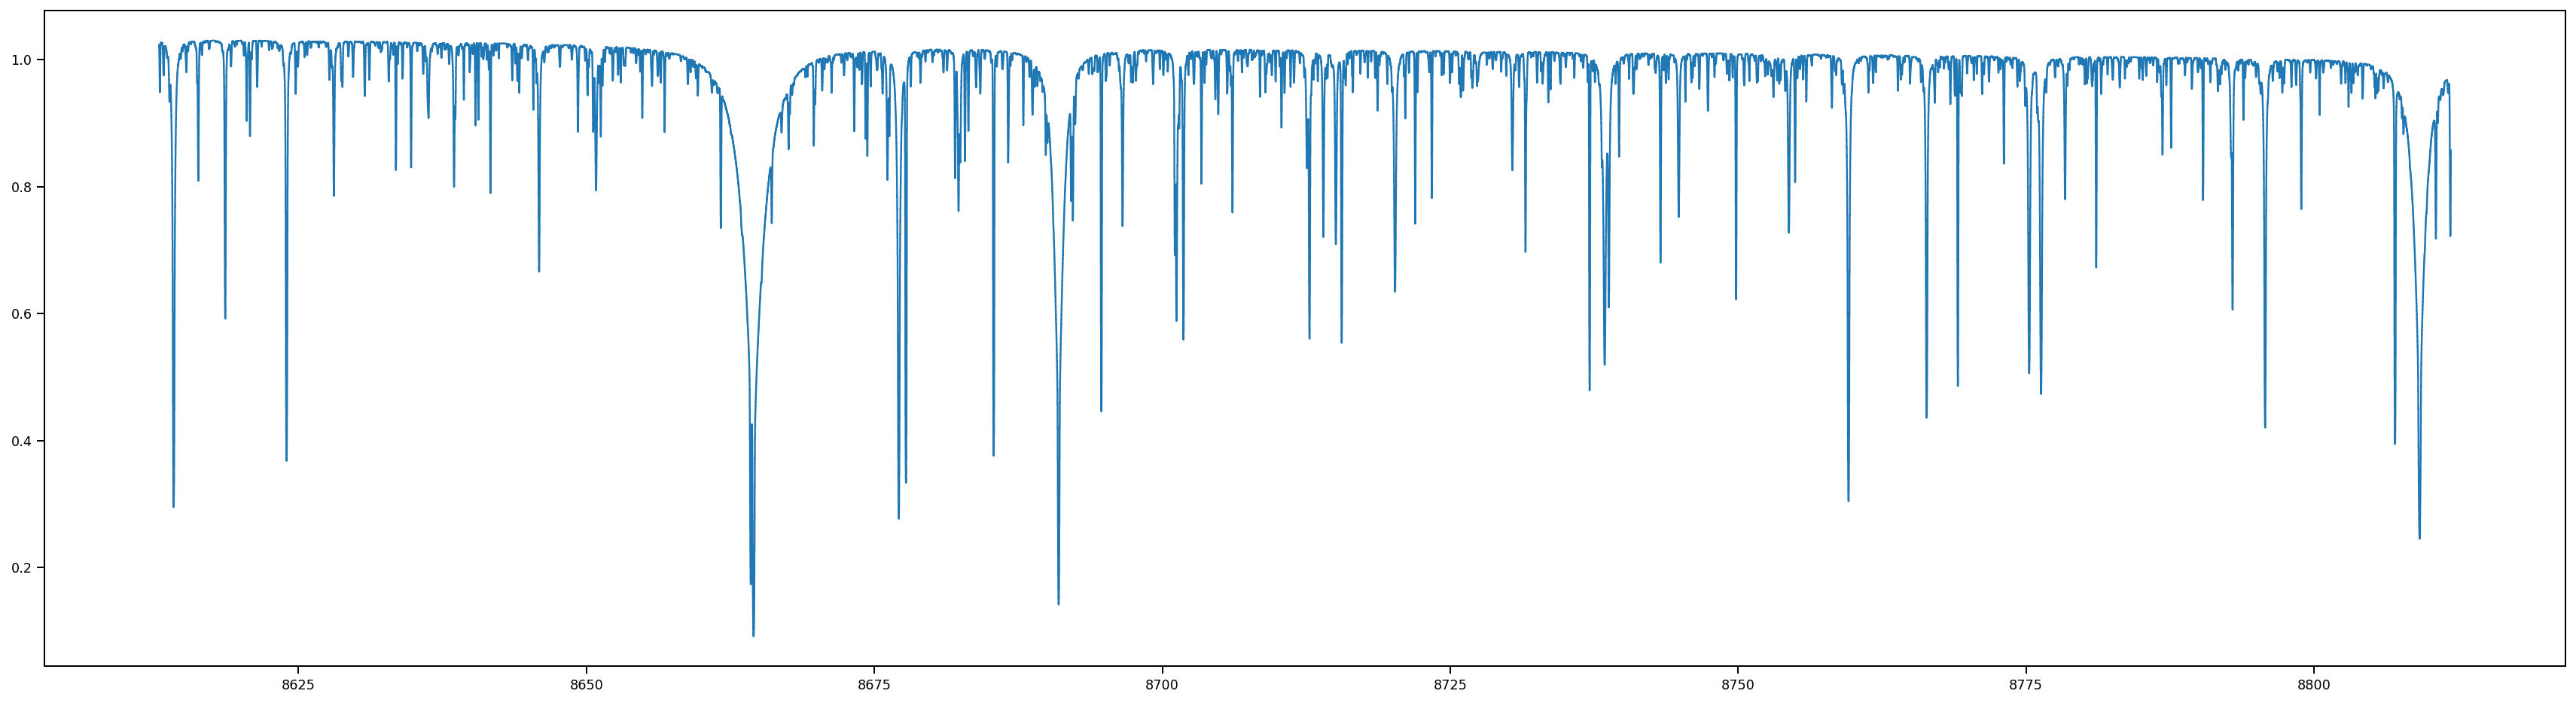

In [25]:
plt.figure(figsize=(30, 8))
plt.step(model.wl_native, model.flux_native)

Attempt to interpolate this signal.

In [26]:
from torchinterp1d import Interp1d

In [64]:
x = model.wl_native
y = model.flux_native

In [65]:
x.shape, y.shape

(torch.Size([19900]), torch.Size([19900]))

In [81]:
x_new = data_cube[6, 5, :]
x_new.shape

torch.Size([2048])

In [82]:
y_dat = data_cube[0, 5, :]

In [83]:
y_new = Interp1d()(x, y, x_new, None)

In [86]:
y_new.shape

torch.Size([1, 2048])

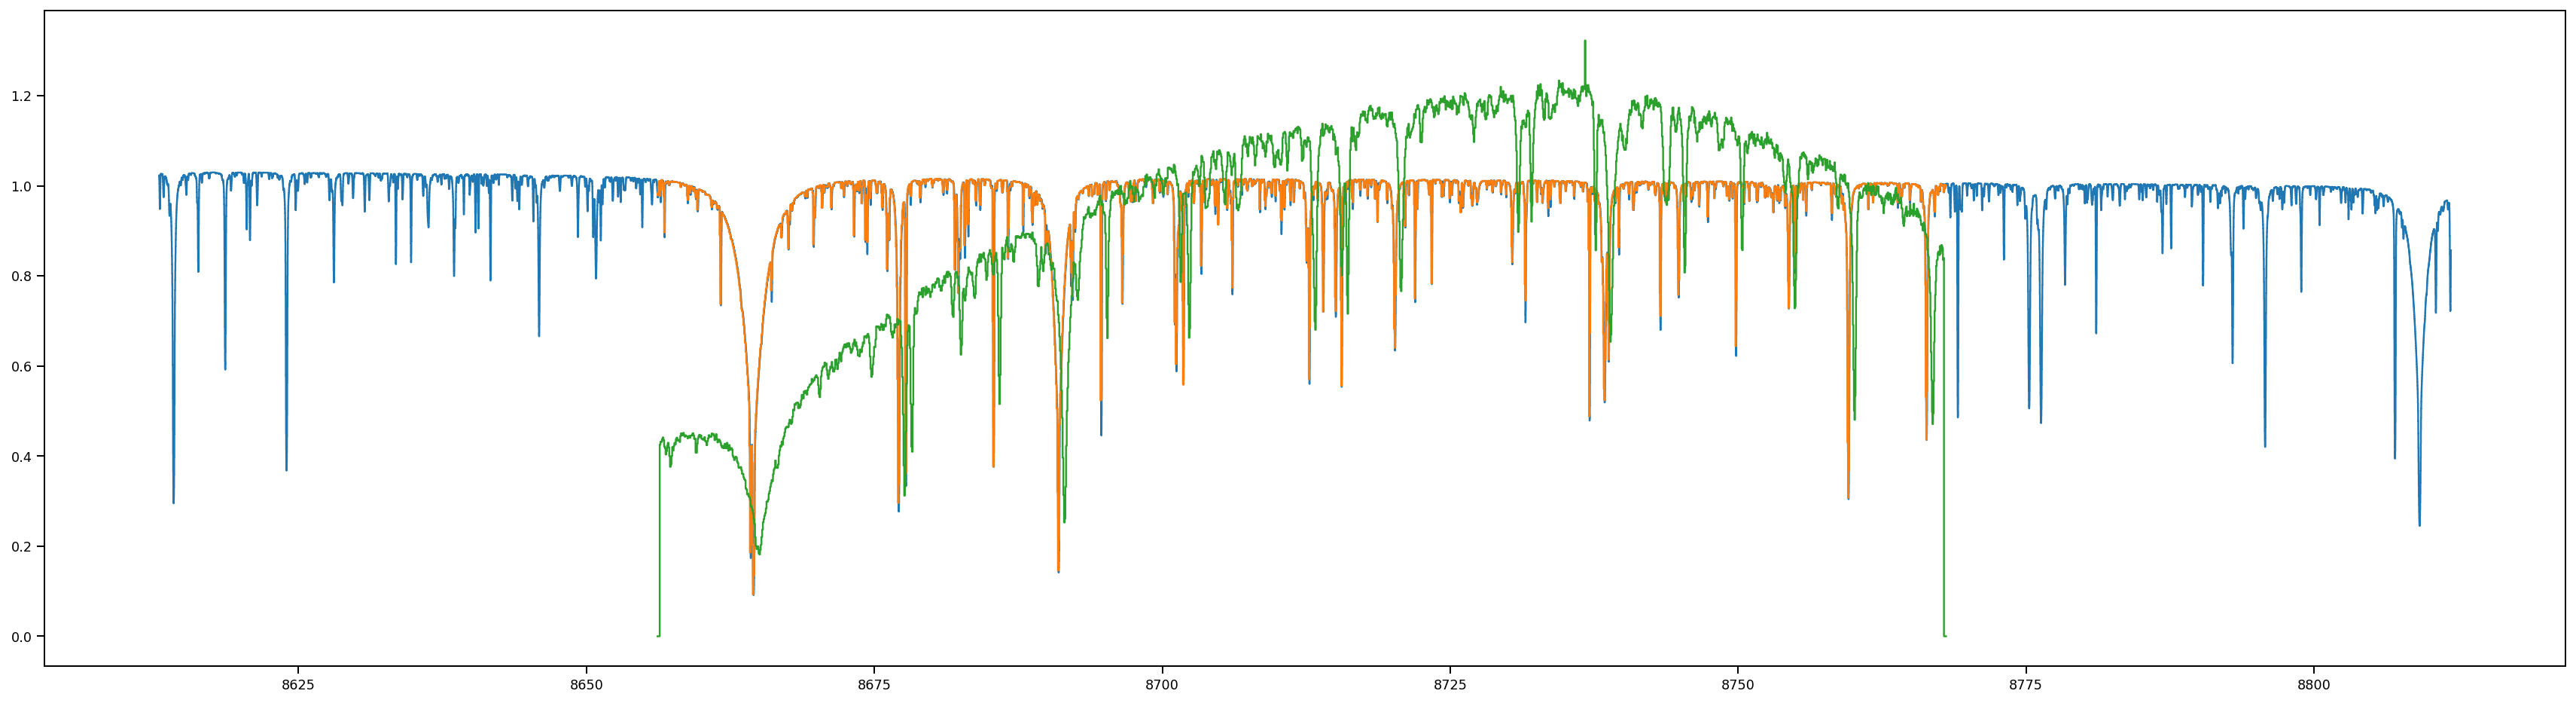

In [85]:
plt.figure(figsize=(30, 8))
plt.step(x, y)
plt.step(x_new, y_new.squeeze())
plt.step(x_new, y_dat)